In [ ]:
!pip install pydotplus
!pip install dtreeviz
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from google.colab import files
uploaded = files.upload()

In [ ]:
# Lendo o arquivo em .xlsx
dados = pd.read_excel("Atividade 3 - Bases.xlsx") 

# Decrição do Problema

O objetivo dessa atividade é classificar pessoas pela sua propensão a comprar um novo leitor digital (eReader), de modo a melhorar a efetividade de campanhas de marketing. 
Para alcançar este objetivo, iremos utilizar o modelo de árvores de decisão para minerar hábitos de consumo de usuários de um site de e-commerce. 

O sociólogo Everett Rogers publicou, na década de 60, um trabalho que mostrava a adoção de novas tecnologias por consumidores. Ele identificou os seguintes grupos de consumidores: inovators, early adopters, early majority e late majority. Os dois primeiros grupos compreendem os usuários mais propensos a comprar uma nova tecnologia, enquanto os dois últimos eventualmente poderão comprar a tecnologia, se achar conveniente.


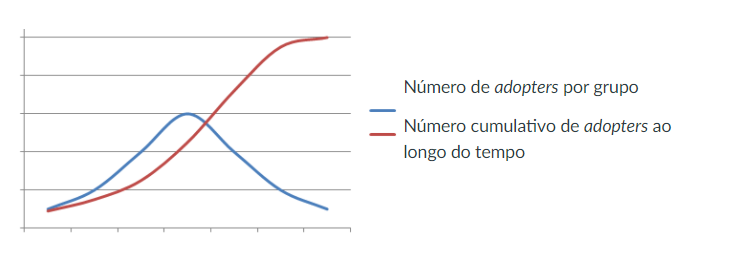

*   Esta atividade irá precisar da base de dados:             Atividade 3 - Bases.xlsx 
*   Serão usadas duas bases de dados disponíveis em duas planilhas do arquivo Atividade 3 - Bases.xlsx. A primeira planilha se chama TREINAMENTO e contém os registros já classificados. A segunda planilha se chama VALIDAÇÃO, e contém novos registros sem classes definidas para podermos avaliar o modelo.
*   Analise os dados usando a descrição estatística. Você perceberá que, aparentemente, não há valores omissos nem inconsistentes, mas ainda temos que preparar os dados.
*   O campo ID_usuário não tem relação com os consumidores, propriamente dito e não deverá ser utilizado na modelagem.
*   A classe destino deve ser o campo Adoção_eReader.

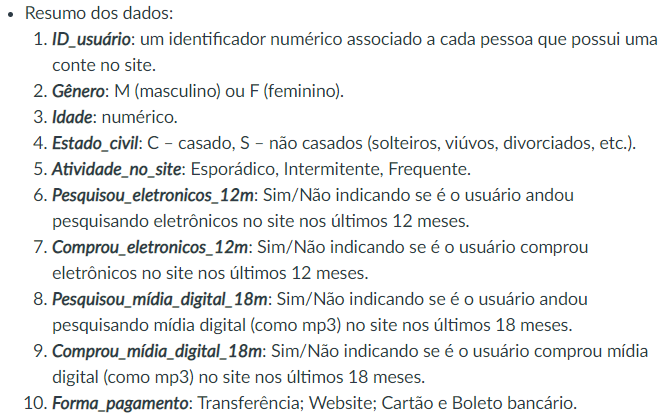
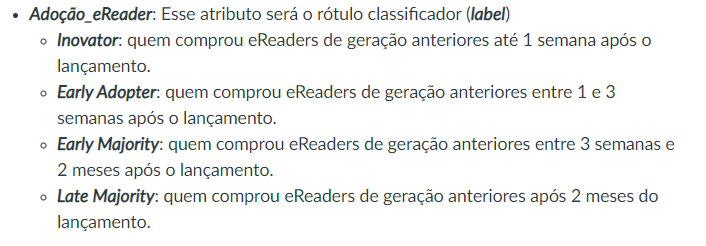





# Transformação dos dados

In [ ]:
dadosT = pd.read_excel("Atividade 3 - Bases.xlsx",sheet_name = 'TREINAMENTO')


In [ ]:
dadosV = pd.read_excel("Atividade 3 - Bases.xlsx",sheet_name = 'VALIDAÇÃO')
dadosV.head(2)

In [ ]:
#Eliminando colunas que não serão utilizadas na classificação
dadosT.drop(columns=['ID_usuário'], inplace = True)
dadosV.drop(columns=['ID_usuário'], inplace = True)

Atributos convertidos para o formato de dicionário.
DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True).
Posteriormente transformados em binário, para cada par (key, value) do dicionário.


le = preprocessing.LabelEncoder()                     
le.fit(dados)

In [ ]:
#Descritiva para os dados de treinamento e teste
print(f'\nDimensões:',dadosT.shape)
print(f'\nDimensões:',dadosT.keys())
print(f'\n', dadosT.describe(), sep='\n')
print(f'\n', dadosT.describe(include = [object]), sep='\n')

In [ ]:
#Descritiva para os dados de validação
print(f'\nDimensões:',dadosV.shape)
print(f'\nDimensões:',dadosV.keys())
print(f'\n',dadosV.describe(), sep='\n')
print(f'\n', dadosV.describe(include = [object]), sep='\n')

In [ ]:
#Transformação das variáveis explicativas - Dados para Treinamento e Teste
X_dict = dadosT.iloc[:,0:9].T.to_dict().values()  # Dicionários dos atributos explicativos
print(X_dict) # Exibe o dado convertido em dicionario.

vect = DictVectorizer(sparse=False) # Instancia o método DictVectorizer
XT = vect.fit_transform(X_dict) #Transforma para matriz binária 
print(f'\n',XT) # Exibe os dados convertidos em matriz númerica binária

In [ ]:
# Tansformação da variável dependente - dados de teste
le = LabelEncoder()  # Conversão dos dados dependentes categóricos para númericos
yT = le.fit_transform(dados.iloc[:,10])

In [ ]:
# Tansformação das variáveis de Validação para aplicação do modelo

X_dict = dadosV.iloc[:,0:9].T.to_dict().values()  # Dicionários dos atributos explicativos
print(X_dict) # Exibe o dado convertido em dicionario.

vect = DictVectorizer(sparse=False) # Instancia o método DictVectorizer
XV = vect.fit_transform(X_dict) #Transforma para matriz binária 
print(f'\n',XV) # Exibe os dados convertidos em matriz númerica binária


In [ ]:
#Separação da matriz binária de variáveis explicativas para Dados para Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(XT, yT , random_state=0, test_size=0.15, stratify=yT) 
#70 % dos dados para treino utilizando amostragem estratificada

# Indução do modelo - Cenários de ajuste
        


*   Vamos construir a árvore de decisão para os dados de treinamento.
*   Lembrando-se que o processo de Data Science sugere que o aprendizado de máquina é um processo iterativo, volte ao modelo e altere os valores dos diversos parâmetros da árvore.

1.   Altere o critério de seleção de atributos para e veja o resultado.
2.   Para evitar o overfitting, habilite as opções de prunning. Altere valores e simplifique a árvore de decisão para uma complexidade que julgar aceitável.









## Cenários

 Foi feito a variação dos parâmetros abaixo:
*   random_state= (variando)
*   criterion= ['entropy'] e ['Gini']
*   ccp_alpha

Conservou-se o melhor cenário: 

Determinação da complexidade da árvore:

In [ ]:
treeReader1 = DecisionTreeClassifier(random_state=1, criterion='entropy')  

import matplotlib.pyplot as plt
path = treeReader1.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
   clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
   clf.fit(X_train, y_train)
   clfs.append(clf)

train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('acurracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label ='train')
ax.plot(ccp_alphas, test_scores, marker = 'o', label ='test');

Reajuste considerando o redução de complexidade da árvore de decisão: 

In [ ]:
target_names = dadosT['Adoção_eReader'].unique()
treeReader1 = DecisionTreeClassifier(random_state=2, criterion='entropy',ccp_alpha=0.02)
treeReader1 = treeReader1.fit(X_train, y_train)                           
print("\nAcurácia do teste:", treeReader1.score(X_train, y_train))         

y_pred = treeReader1.predict(X_test)                                      
print("\nAcurácia de previsão:", accuracy_score(y_test, y_pred))  

print("\n", classification_report(y_test, y_pred, target_names = target_names))                                   

cnf_matrix = confusion_matrix(y_test, y_pred)                             
cnf_table = pd.DataFrame(data= cnf_matrix, index=["Inovator", "Early adopter","Early Majority","Late Majority"], columns=["Inovator(prev)", "Early adopter(prev)","Early Majority(prev)","Late Majority(prev)"])
from IPython.display import display
print(f'\n', display(cnf_table))


Contribuição dos atributos para a nova classificação com a complexidade da árvore reduzida:

In [ ]:
feature_names = list(dadosT.columns)
list(zip(feature_names,treeReader1.feature_importances_))

# Exibição da árvore de decisão

In [ ]:
from dtreeviz.trees import *

viz = dtreeviz(treeReader1,
              X_train,
              y_train,
              target_name='Adoção_eReader',
               feature_names=vect.feature_names_,
              class_names=["Inovator", "Early adopter","Early Majority","Late Majority"],
              fancy=True)  
viz.view()

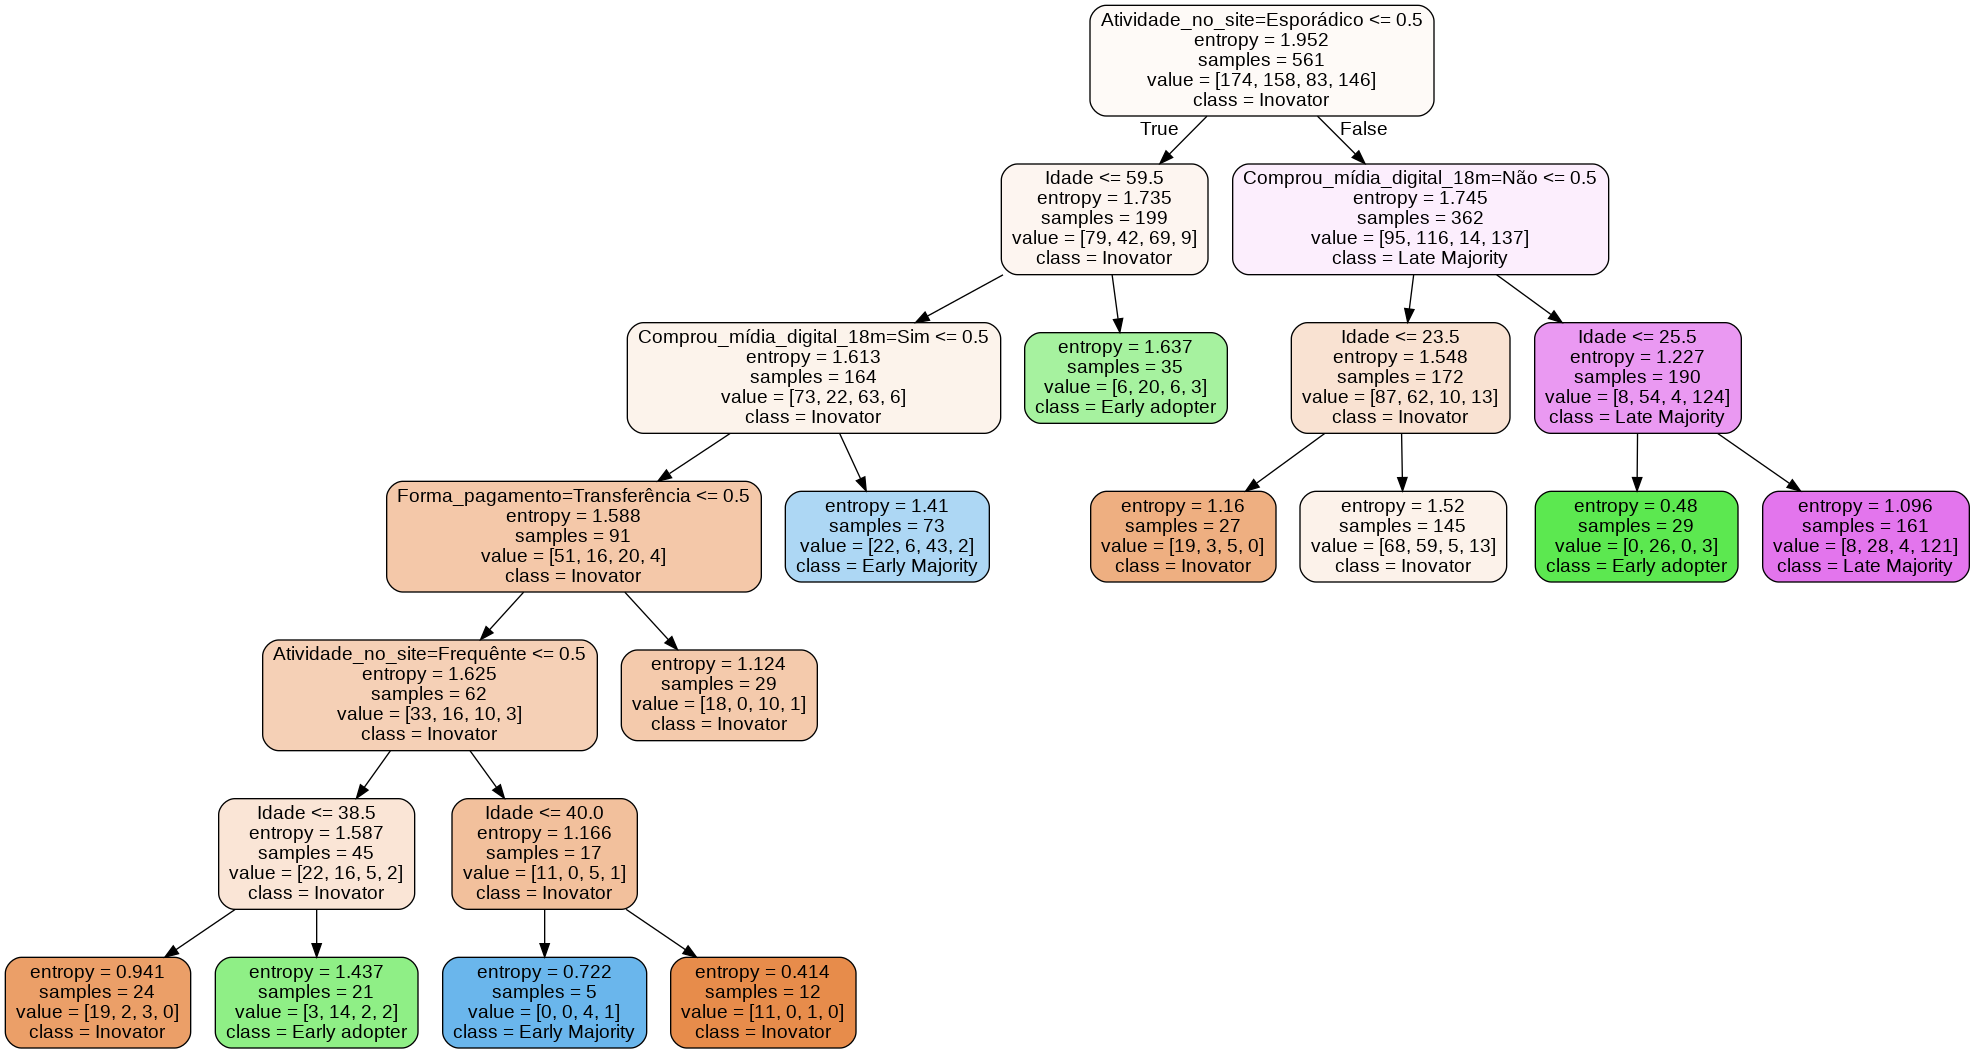

In [ ]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(treeReader1, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=vect.feature_names_,  
                                class_names=["Inovator", "Early adopter","Early Majority","Late Majority"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 

# Show graph
Image(graph.create_png())


In [ ]:
dadosT['Adoção_eReader'].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: Adoção_eReader, dtype: int64

# Discussão 

3.   Baseado nesses valores, tente interpretar os resultados. Por exemplo, tente entender qual o potencial de alcance daquela regra na população. Quantos registros ela está representando. Analise o nó folha e identifique se as “confusões” geradas por cada regra podem ajudar a diferenciar uma regra boa de uma regra ruim.

* No primeiro nó raiz ela separou o tempo de compra de eReader em função de atividade no site. Das 561 entradas, 199 foram classificados em innovator e 362 em Late majority. Ocorrendo baixa redução no valor da entropia em ambos os nós. Assim  foi necessário adição de regras para classificar de forma mais acurada. Os nós folhas com baixa entropia são bom classificadores e permitem generalizar a classificaçao para a população, já os nós folhas com alta entropia, tem baixa acurácia na classificação.  Quanto mais ramificações, maior a quantidade de regras para variáveis a serem consideradas para a classificação dos dados. Isso reduz o poder de generalização para a população.  O modelo ajustado gerou um classificador de baixo potencial de alcance em geral na população, ou seja, baixa generalização. No caso do exercicio, parece que o agrupamento das variáveis de saída do modelo no banco de dados enviesou a classificação, aumentando a quantidade de regras com alto valor de entropia para a classificação dos dados. 



* *Testei o ajustei agrupando as faixas dos dados de saída. Porém não ocorreu melhor no ajuste. Acho que para melhorar os dados de saída deveriam ser caracterizados por dia da semana ou não agrupados em faixa, assim aumentariamos a  variabilidade dos dados e consequentimente as regras teriam melhores valores de entropia. Tentei da seguinte forma:* 


* *Fiz somente replaces nos dados de saída, testando diferentes grupos de saídas, mas no meu não mudou pouca coisa.  dadosT['Adoção_eReader'] = dadosT['Adoção_eReader'].str.replace('Innovator',  'Group')  e dadosT['Adoção_eReader'] = dadosT['Adoção_eReader'].str.replace('Early Adopter',  'Group') . Parece que a metodologia utilizada para o agrupamento dos dados em classes não foi adequada.*

